In [494]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [495]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import RobustScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import sklearn.metrics

In [496]:
pip install feature-engine

In [497]:
from feature_engine import imputation as imp
from feature_engine import encoding as enc
from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.encoding import OneHotEncoder
from feature_engine import imputation as mdi
from feature_engine.wrappers import SklearnTransformerWrapper

In [498]:
df_train_original = pd.read_csv('z_train.csv')

In [499]:
df_train = df_train_original.copy()

In [500]:
df_train.shape

(15326, 14)

In [501]:
df_train_original.shape

(15326, 14)

In [502]:
df_train.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0


In [503]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             15326 non-null  int64  
 1   city                    15326 non-null  object 
 2   city_development_index  15326 non-null  float64
 3   gender                  11725 non-null  object 
 4   relevent_experience     15326 non-null  object 
 5   enrolled_university     15024 non-null  object 
 6   education_level         14957 non-null  object 
 7   major_discipline        13089 non-null  object 
 8   experience              15276 non-null  object 
 9   company_size            10592 non-null  object 
 10  company_type            10435 non-null  object 
 11  last_new_job            14987 non-null  object 
 12  training_hours          15326 non-null  int64  
 13  target                  15326 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [504]:
df_train.isnull()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,False,False,False,False,False,False,False,False,False,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,True,True,False,False,False
3,False,False,False,True,False,True,False,False,False,True,False,False,False,False
4,False,False,False,True,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15321,False,False,False,False,False,False,False,False,False,True,True,False,False,False
15322,False,False,False,False,False,False,False,False,False,True,True,False,False,False
15323,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15324,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [505]:
df_train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [506]:
df_train.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [507]:
df_train.target.value_counts()

0.0    11502
1.0     3824
Name: target, dtype: int64

In [508]:
df_train.gender.value_counts()

Male      10577
Female      998
Other       150
Name: gender, dtype: int64

In [509]:
df_train.company_size.value_counts()

50-99        2448
100-500      2059
10000+       1653
10/49        1173
1000-4999    1066
<10          1043
500-999       707
5000-9999     443
Name: company_size, dtype: int64

In [510]:
df_train.company_type.value_counts()

Pvt Ltd                7873
Funded Startup          792
Public Sector           773
Early Stage Startup     489
NGO                     421
Other                    87
Name: company_type, dtype: int64

In [511]:
df_train.experience.value_counts()

>20    2633
5      1148
4      1104
3      1084
6       971
2       905
7       835
10      793
9       780
8       643
15      553
11      538
14      479
1       440
16      420
<1      408
12      384
13      304
17      281
19      235
18      225
20      113
Name: experience, dtype: int64

In [512]:
#TRANSFORMACION 1
df_train.drop([ 'city','company_size'], axis=1 , inplace = True)

In [513]:
df_train.columns

Index(['enrollee_id', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

In [514]:
def experiencia_convert(num):
    num= str(num)
    if '>' in num:
        num = num.replace('>','')
        return num
    
    if '<' in num:
        num = num.replace('<1','0')
        return num
    
    if 'nan' in num:
        num = num.replace('nan','')
        return num
    
    else:
        return num

In [515]:
#TRANSFORMACION 2
df_train.experience = df_train.experience.apply(experiencia_convert)
df_train.experience.value_counts()

20    2746
5     1148
4     1104
3     1084
6      971
2      905
7      835
10     793
9      780
8      643
15     553
11     538
14     479
1      440
16     420
0      408
12     384
13     304
17     281
19     235
18     225
        50
Name: experience, dtype: int64

In [516]:
df_train.experience.head(2)

0    20
1    15
Name: experience, dtype: object

In [517]:
df_train['experience'] = pd.to_numeric(df_train.experience)

In [518]:
df_train.experience[0].dtype

dtype('float64')

In [519]:
df_train.experience.loc[5680].dtype

dtype('float64')

In [520]:
df_train.head(5)

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,8949,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,1,36,1.0
1,29725,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,Pvt Ltd,>4,47,0.0
2,11561,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,never,83,0.0
3,33241,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,Pvt Ltd,never,52,1.0
4,21651,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11.0,NaN,1,24,1.0


In [521]:
def cambiar_new_job(num):
    num= str(num)
    #print(type(num))
    if '>4' in num:
        num = num.replace('>4','5')
        #num = float(num)
        return num
    
    if 'never' in num:
        num = num.replace('never','0')
        #num = float(num)
        return num
    
    if 'nan' in num:
        num = num.replace('nan','')
        #num = float(num)
        return num
    
    else:
        #num = float(num)
        return num

In [522]:
#TRANSFORMACION 3

df_train.last_new_job = df_train.last_new_job.apply(cambiar_new_job)
df_train['last_new_job'] = pd.to_numeric(df_train.last_new_job)

In [523]:
df_train.last_new_job[0].dtype

dtype('float64')

In [524]:
df_train.experience.loc[15000].dtype

dtype('float64')

In [525]:
df_train.columns

Index(['enrollee_id', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

In [526]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(columns = ['target']), df_train.target, test_size = 0.2, random_state = 525)

In [527]:
df_train.shape

(15326, 12)

In [528]:
X_train.shape

(12260, 11)

In [529]:
X_test.shape

(3066, 11)

In [530]:
12260+3066

15326

In [531]:
y_train.shape

(12260,)

In [532]:
!pip install imblearn


In [533]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [534]:
sm = SMOTE(random_state = 525)

In [535]:
oversampler = RandomOverSampler()
undersampler = RandomUnderSampler()

In [536]:
# Deje los mismos nombres para no cambiarlos en todo el book pero es UNDERSAMPLING
X_train_over, y_train_over = undersampler.fit_resample(X_train, y_train)

In [537]:
X_train_over.shape

(6078, 11)

In [538]:
y_train_over.shape

(6078,)

In [539]:
y_train_over.value_counts()

0.0    3039
1.0    3039
Name: target, dtype: int64

In [540]:
from sklearn.tree import DecisionTreeClassifier

In [541]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [542]:
import graphviz
from sklearn import tree

In [543]:
from sklearn.model_selection import GridSearchCV

In [544]:
pipeline_competencia = Pipeline([('mean_imputation', mdi.MeanMedianImputer(imputation_method = 'mean',
                                                                             variables = ['experience', 'last_new_job','training_hours'])),
                                   ('mode_imputation', mdi.CategoricalImputer(imputation_method = 'frequent',
                                    variables = ['enrolled_university', 'education_level', 'major_discipline','relevent_experience','gender','company_type'])),
                                   ('escalar', SklearnTransformerWrapper(StandardScaler(), variables=['experience', 'last_new_job','training_hours'])),
                                   ('one_hot', enc.OneHotEncoder(variables = ['enrolled_university', 'education_level', 'major_discipline','relevent_experience','gender','company_type'])),
                                   #('modelo', DecisionTreeClassifier())
                                   ], verbose = True)
pipeline_competencia.fit(X_train_over, y_train_over)

[Pipeline] ... (step 1 of 4) Processing mean_imputation, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing mode_imputation, total=   0.0s
[Pipeline] ........... (step 3 of 4) Processing escalar, total=   0.0s
[Pipeline] ........... (step 4 of 4) Processing one_hot, total=   0.0s


Pipeline(steps=[('mean_imputation',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['experience', 'last_new_job',
                                              'training_hours'])),
                ('mode_imputation',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['enrolled_university',
                                               'education_level',
                                               'major_discipline',
                                               'relevent_experience', 'gender',
                                               'company_type'])),
                ('escalar',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['experience',
                                                      'last_new_job',
                                                      'training_hours'

In [545]:
#pred = pipeline_netflix_price.predict(X_train)
#pred_test = pipeline_netflix_price.predict(X_test)

In [546]:
df_test_original = pd.read_csv('z_test.csv')

In [547]:
df_test_original.shape

(3832, 13)

In [548]:
df_test_original = df_test_original[['enrollee_id', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_type', 'last_new_job',
       'training_hours']]

In [549]:
df_test_original.head(5)

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours
0,23603,0.920,Male,No relevent experience,Full time course,Graduate,STEM,5,NaN,1,78
1,22499,0.890,NaN,Has relevent experience,Full time course,High School,NaN,6,Pvt Ltd,1,36
2,10465,0.689,Male,No relevent experience,no_enrollment,Graduate,STEM,5,NaN,never,34
3,8293,0.855,Female,Has relevent experience,no_enrollment,Masters,STEM,9,Pvt Ltd,1,149
4,4246,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,16,Funded Startup,2,7


In [550]:
#TRANSFORMACION 1
#df_train.drop([ 'city','company_size'], axis=1 , inplace = True)

In [551]:
#TRANSFORMACION 2
df_test_original.experience = df_test_original.experience.apply(experiencia_convert)
df_test_original.experience.value_counts()

20    688
4     299
5     282
3     270
6     245
2     222
9     200
7     193
10    192
8     159
15    133
11    126
0     114
12    110
1     109
14    107
13     95
16     88
19     69
17     61
18     55
       15
Name: experience, dtype: int64

In [552]:
df_test_original['experience'] = pd.to_numeric(df_test_original.experience)

In [553]:
#TRANSFORMACION 3

df_test_original.last_new_job = df_test_original.last_new_job.apply(cambiar_new_job)
df_test_original['last_new_job'] = pd.to_numeric(df_test_original.last_new_job)

In [554]:
df_test_original.last_new_job.value_counts()

1.0    1582
5.0     663
2.0     582
0.0     507
3.0     208
4.0     206
Name: last_new_job, dtype: int64

In [555]:
df_test_original.head(2)

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours
0,23603,0.92,Male,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,1.0,78
1,22499,0.89,NaN,Has relevent experience,Full time course,High School,NaN,6.0,Pvt Ltd,1.0,36


In [556]:
df_test_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3832 entries, 0 to 3831
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             3832 non-null   int64  
 1   city_development_index  3832 non-null   float64
 2   gender                  2925 non-null   object 
 3   relevent_experience     3832 non-null   object 
 4   enrolled_university     3748 non-null   object 
 5   education_level         3741 non-null   object 
 6   major_discipline        3256 non-null   object 
 7   experience              3817 non-null   float64
 8   company_type            2583 non-null   object 
 9   last_new_job            3748 non-null   float64
 10  training_hours          3832 non-null   int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 329.4+ KB


In [557]:
df_test_original.shape

(3832, 11)

In [558]:
data_test_original = pipeline_competencia.transform(df_test_original)

In [559]:
data_test_original.shape

(3832, 30)

In [560]:
X_train_transformed = pipeline_competencia.transform(X_train_over)

In [561]:
X_train_transformed.head()

,enrollee_id,city_development_index,experience,last_new_job,training_hours,enrolled_university_no_enrollment,enrolled_university_Part time course,enrolled_university_Full time course,education_level_Graduate,education_level_Masters,...,relevent_experience_No relevent experience,gender_Male,gender_Female,gender_Other,company_type_Funded Startup,company_type_Public Sector,company_type_Early Stage Startup,company_type_Pvt Ltd,company_type_NGO,company_type_Other
0,6514,0.920,0.573054,-0.573201,-0.783949,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,25301,0.897,-0.973164,0.652948,1.539404,0,1,0,0,1,...,1,1,0,0,0,1,0,0,0,0
2,20765,0.920,-1.127786,-0.573201,-0.885702,1,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
3,2121,0.893,0.418432,-0.573201,-0.393897,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,14417,0.920,1.655406,1.266022,0.114867,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [562]:
X_train_transformed.shape

(6078, 30)

In [563]:
X_train_over.head()

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours
0,6514,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,Funded Startup,1.0,19
1,25301,0.897,Male,No relevent experience,Part time course,Masters,STEM,3.0,Public Sector,3.0,156
2,20765,0.920,NaN,No relevent experience,no_enrollment,Primary School,NaN,2.0,Early Stage Startup,1.0,13
3,2121,0.893,Male,Has relevent experience,no_enrollment,Masters,STEM,12.0,Pvt Ltd,1.0,42
4,14417,0.920,Male,Has relevent experience,no_enrollment,Graduate,Arts,20.0,Pvt Ltd,4.0,72


In [564]:
X_train_transformed.columns

Index(['enrollee_id', 'city_development_index', 'experience', 'last_new_job',
       'training_hours', 'enrolled_university_no_enrollment',
       'enrolled_university_Part time course',
       'enrolled_university_Full time course', 'education_level_Graduate',
       'education_level_Masters', 'education_level_Primary School',
       'education_level_High School', 'education_level_Phd',
       'major_discipline_STEM', 'major_discipline_Arts',
       'major_discipline_No Major', 'major_discipline_Business Degree',
       'major_discipline_Humanities', 'major_discipline_Other',
       'relevent_experience_Has relevent experience',
       'relevent_experience_No relevent experience', 'gender_Male',
       'gender_Female', 'gender_Other', 'company_type_Funded Startup',
       'company_type_Public Sector', 'company_type_Early Stage Startup',
       'company_type_Pvt Ltd', 'company_type_NGO', 'company_type_Other'],
      dtype='object')

In [565]:
decision_tree = DecisionTreeClassifier()
params = {'splitter':['random', 'best'], 'max_depth' : [15, 20, 25], 'random_state':[525]}
cvtree = GridSearchCV(decision_tree, params).fit(X_train_transformed, y_train_over)

In [566]:
cvtree.best_estimator_

DecisionTreeClassifier(max_depth=15, random_state=525, splitter='random')

In [567]:
#DecisionTreeClassifier(max_depth=15, random_state=525)
#DecisionTreeClassifier(max_depth=25, random_state=525)

In [568]:
tree_classifier = DecisionTreeClassifier( max_depth = 15, random_state=525).fit(X_train_transformed, y_train_over)

In [569]:
tree_classifier.feature_importances_

array([0.2108048 , 0.30759912, 0.09295252, 0.0439674 , 0.15745257,
       0.01807556, 0.00393069, 0.00965594, 0.02139235, 0.00472171,
       0.        , 0.00531292, 0.00473055, 0.00840814, 0.00663766,
       0.00440736, 0.00564492, 0.00644689, 0.00439848, 0.03937997,
       0.00073641, 0.0033311 , 0.00596551, 0.0016368 , 0.00405906,
       0.00380131, 0.00472301, 0.01082639, 0.00752311, 0.00147775])

In [570]:
tree_classifier.feature_names_in_

array(['enrollee_id', 'city_development_index', 'experience',
       'last_new_job', 'training_hours',
       'enrolled_university_no_enrollment',
       'enrolled_university_Part time course',
       'enrolled_university_Full time course', 'education_level_Graduate',
       'education_level_Masters', 'education_level_Primary School',
       'education_level_High School', 'education_level_Phd',
       'major_discipline_STEM', 'major_discipline_Arts',
       'major_discipline_No Major', 'major_discipline_Business Degree',
       'major_discipline_Humanities', 'major_discipline_Other',
       'relevent_experience_Has relevent experience',
       'relevent_experience_No relevent experience', 'gender_Male',
       'gender_Female', 'gender_Other', 'company_type_Funded Startup',
       'company_type_Public Sector', 'company_type_Early Stage Startup',
       'company_type_Pvt Ltd', 'company_type_NGO', 'company_type_Other'],
      dtype=object)

In [571]:
#importancia = pd.DataFrame(tree_classifier.feature_names_in_)
#importancia

In [572]:
#importancia['Peso'] = tree_classifier.feature_importances_
#importancia

C:\Users\tllt1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


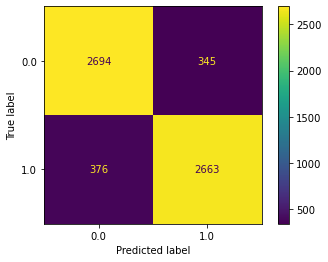

In [573]:
metrics.plot_confusion_matrix(tree_classifier, X_train_transformed, y_train_over)

In [574]:
pred_train = tree_classifier.predict(X_train_transformed)
pred_train

array([0., 0., 0., ..., 1., 1., 0.])

In [575]:
pred_train_probas = tree_classifier.predict_proba(X_train_transformed)
pred_train_probas

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.89655172, 0.10344828]])

In [576]:
metrics.roc_auc_score(y_train_over, pred_train)

0.8813754524514641

In [577]:
metrics.roc_auc_score(y_train_over, pred_train_probas[:,1])

0.958282158635122

In [578]:
from sklearn.ensemble import RandomForestClassifier

In [673]:
forest = RandomForestClassifier()
params = {'max_depth': [10, 30, 35], 'n_estimators':[50, 60, 70]}
grid_forest = GridSearchCV(forest, params).fit(X_train_transformed, y_train_over)

In [674]:
grid_forest.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=60)

In [753]:
best_forest = RandomForestClassifier(max_depth=10, n_estimators=50).fit(X_train_transformed, y_train_over)

C:\Users\tllt1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


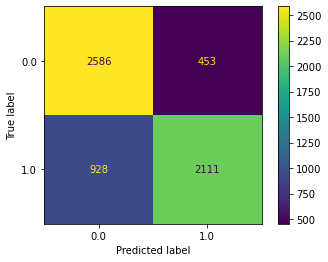

In [754]:
metrics.plot_confusion_matrix(best_forest, X_train_transformed, y_train_over)

In [755]:
pred_train_forest = best_forest.predict(X_train_transformed)
pred_train_forest

array([0., 0., 0., ..., 1., 1., 0.])

In [756]:
X_train_transformed.shape


(6078, 30)

In [757]:
y_train_over.shape

(6078,)

In [758]:
pred_train_forest_probas = best_forest.predict_proba(X_train_transformed)
pred_train_forest_probas

array([[0.74741226, 0.25258774],
       [0.64593808, 0.35406192],
       [0.74434212, 0.25565788],
       ...,
       [0.17744976, 0.82255024],
       [0.16347238, 0.83652762],
       [0.63489406, 0.36510594]])

In [759]:
pred_train_forest_probas.shape

(6078, 2)

In [760]:
metrics.roc_auc_score(y_train_over, pred_train_forest)

0.7727871010200724

In [761]:
metrics.roc_auc_score(y_train_over, pred_train_forest_probas[:,1])

0.8704985890888017

In [762]:
data_test = pipeline_competencia.transform(X_test)

In [763]:
X_test.shape

(3066, 11)

In [764]:
pred_data_test = best_forest.predict(data_test)

In [765]:
metrics.roc_auc_score(y_test, pred_data_test)

0.7143422401058872

ADABOOST

In [777]:
from sklearn.ensemble import AdaBoostClassifier

In [894]:
clf = AdaBoostClassifier()
params = {'n_estimators':[70, 90, 120]}
boost = GridSearchCV(clf, params).fit(X_train_transformed, y_train_over)

In [895]:
boost.best_estimator_

AdaBoostClassifier(n_estimators=70)

In [896]:
best_boost = AdaBoostClassifier(n_estimators=70, random_state = 525).fit(X_train_transformed, y_train_over)

C:\Users\tllt1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


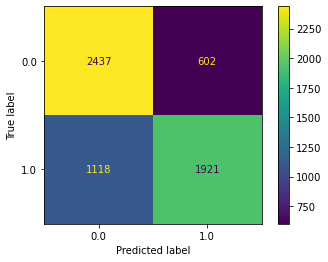

In [897]:
metrics.plot_confusion_matrix(best_boost, X_train_transformed, y_train_over)

In [898]:
pred_train_boost = best_boost.predict(X_train_transformed)
pred_train_boost

array([0., 0., 0., ..., 1., 1., 0.])

In [899]:
pred_train_boost_probas = best_boost.predict_proba(X_train_transformed)
pred_train_boost_probas

array([[0.50434347, 0.49565653],
       [0.50135952, 0.49864048],
       [0.50381088, 0.49618912],
       ...,
       [0.49662078, 0.50337922],
       [0.49431121, 0.50568879],
       [0.50307739, 0.49692261]])

In [900]:
X_train_transformed.shape

(6078, 30)

In [901]:
y_train_over.shape

(6078,)

In [902]:
metrics.roc_auc_score(y_train_over, pred_train_boost)

0.7170121750575849

In [903]:
metrics.roc_auc_score(y_train_over, pred_train_boost_probas[:,1])

0.7791818674874974

In [904]:
data_test = pipeline_competencia.transform(X_test)

In [905]:
X_test.shape

(3066, 11)

In [906]:
pred_data_test = best_boost.predict(data_test)

In [907]:
metrics.roc_auc_score(y_test, pred_data_test)

0.7200414948187325

In [909]:
pred_data_test_original = best_boost.predict_proba(data_test_original)

In [910]:
pred_data_test_original.shape

(3832, 2)

In [911]:
df_competencia_try5 = df_test_original[['enrollee_id']]
df_competencia_try5.shape

(3832, 1)

In [912]:
lista_target=[]
for x in pred_data_test_original:
    lista_target.append(x[1])

In [913]:
target = pd.DataFrame(lista_target)

In [914]:
df_competencia_try5['target'] = target
df_competencia_try5

C:\Users\tllt1\AppData\Local\Temp\ipykernel_10504\4252255903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_competencia_try5['target'] = target


,enrollee_id,target
0,23603,0.502979
1,22499,0.495994
2,10465,0.500981
3,8293,0.496667
4,4246,0.496063
...,...,...
3827,8880,0.501966
3828,7886,0.498103
3829,12279,0.498850
3830,5326,0.494032


In [917]:
df_competencia_try5.to_csv('Submission_6_ada_under.csv', index=False)

In [918]:
sub5 = pd.read_csv('Submission_6_ada_under.csv')
sub5.shape

(3832, 2)

In [776]:
sub5.head()

,enrollee_id,target
0,23603,0.699323
1,22499,0.359634
2,10465,0.532855
3,8293,0.216429
4,4246,0.245525
